In [11]:
import os
import numpy as np
import nibabel as nib
import glob
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
def preprocess_data(data):
    data = data/data.mean()
    data = np.pad(data, ((8,8), (8,8), (0,0)), 'constant', constant_values=0)
    return data

In [36]:
# preprocessing: padding to 256; divide each case by the mean
data_types = ['train', 'test', 'val']
start_idx = 50
end_idx = 130
for data_type in data_types:
    data_dir = f'/raid/jiang/projects/SubtleGAN/data/brats/HGG/{data_type}'
    save_dir = f'/raid/jiang/projects/SubtleGAN/data/brats_slices/HGG/{data_type}'
    cases = glob.glob(f"{data_dir}/Brats*")
    for case in tqdm(cases):
        print(case)
        case_name = case.split("/")[-1]
        save_case_dir = os.path.join(save_dir, case_name)
        os.makedirs(save_case_dir, exist_ok=True)
        t1 = preprocess_data(nib.load(glob.glob(f"{case}/*_t1.nii.gz")[0]).get_fdata())
        t1ce = preprocess_data(nib.load(glob.glob(f"{case}/*_t1ce.nii.gz")[0]).get_fdata())
        t2 = preprocess_data(nib.load(glob.glob(f"{case}/*_t2.nii.gz")[0]).get_fdata())
        flair = preprocess_data(nib.load(glob.glob(f"{case}/*_flair.nii.gz")[0]).get_fdata())
        for idx in trange(start_idx, end_idx):
            slice_i = np.stack([t1[:, :, idx], t1ce[:, :, idx], t2[:, :, idx], flair[:, :, idx]], axis=0)
            fn = os.path.join(save_case_dir, f"{idx:03d}.npy")
            np.save(fn, slice_i)

  0%|          | 0/180 [00:00<?, ?it/s]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_235_1



  1%|          | 1/180 [00:02<06:08,  2.06s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ABE_1



  1%|          | 2/180 [00:04<06:05,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_208_1



  2%|▏         | 3/180 [00:06<06:05,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AYW_1



  2%|▏         | 4/180 [00:08<06:04,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_372_1



  3%|▎         | 5/180 [00:10<06:01,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_186_1



  3%|▎         | 6/180 [00:12<06:03,  2.09s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_150_1



  4%|▍         | 7/180 [00:14<05:56,  2.06s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_429_1



  4%|▍         | 8/180 [00:16<05:52,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_167_1



  5%|▌         | 9/180 [00:18<05:51,  2.06s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ABY_1



  6%|▌         | 10/180 [00:20<05:47,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_121_1



  6%|▌         | 11/180 [00:22<05:41,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_278_1



  7%|▋         | 12/180 [00:24<05:37,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQT_1



  7%|▋         | 13/180 [00:26<05:34,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ARF_1



  8%|▊         | 14/180 [00:28<05:31,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_335_1



  8%|▊         | 15/180 [00:30<05:31,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AWH_1



  9%|▉         | 16/180 [00:32<05:32,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_171_1



  9%|▉         | 17/180 [00:34<05:32,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_406_1



 10%|█         | 18/180 [00:36<05:28,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ABM_1



 11%|█         | 19/180 [00:38<05:27,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_331_1



 11%|█         | 20/180 [00:40<05:25,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASA_1



 12%|█▏        | 21/180 [00:42<05:26,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_22_1



 12%|█▏        | 22/180 [00:44<05:25,  2.06s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_26_1



 13%|█▎        | 23/180 [00:46<05:22,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_190_1



 13%|█▎        | 24/180 [00:48<05:18,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AYA_1



 14%|█▍        | 25/180 [00:51<05:15,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ATD_1



 14%|█▍        | 26/180 [00:52<05:10,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_23_1



 15%|█▌        | 27/180 [00:55<05:08,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_226_1



 16%|█▌        | 28/180 [00:57<05:07,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AOZ_1



 16%|█▌        | 29/180 [00:59<05:07,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_25_1



 17%|█▋        | 30/180 [01:01<05:05,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AYU_1



 17%|█▋        | 31/180 [01:03<05:01,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_221_1



 18%|█▊        | 32/180 [01:05<04:59,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_247_1



 18%|█▊        | 33/180 [01:07<04:56,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_401_1



 19%|█▉        | 34/180 [01:09<04:59,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_394_1



 19%|█▉        | 35/180 [01:11<04:55,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQG_1



 20%|██        | 36/180 [01:13<04:52,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ATB_1



 21%|██        | 37/180 [01:15<04:52,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ATV_1



 21%|██        | 38/180 [01:17<04:52,  2.06s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_18_1



 22%|██▏       | 39/180 [01:19<04:49,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQZ_1



 22%|██▏       | 40/180 [01:21<04:45,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_322_1



 23%|██▎       | 41/180 [01:23<04:40,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_474_1



 23%|██▎       | 42/180 [01:25<04:36,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_469_1



 24%|██▍       | 43/180 [01:27<04:33,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_162_1



 24%|██▍       | 44/180 [01:29<04:30,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AXN_1



 25%|██▌       | 45/180 [01:31<04:29,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_17_1



 26%|██▌       | 46/180 [01:33<04:26,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_147_1



 26%|██▌       | 47/180 [01:35<04:23,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_436_1



 27%|██▋       | 48/180 [01:37<04:21,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ALX_1



 27%|██▋       | 49/180 [01:39<04:20,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AAL_1



 28%|██▊       | 50/180 [01:41<04:18,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_184_1



 28%|██▊       | 51/180 [01:43<04:18,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_409_1



 29%|██▉       | 52/180 [01:45<04:15,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_498_1



 29%|██▉       | 53/180 [01:47<04:11,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQY_1



 30%|███       | 54/180 [01:49<04:11,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_274_1



 31%|███       | 55/180 [01:51<04:08,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA05_277_1



 31%|███       | 56/180 [01:53<04:06,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_377_1



 32%|███▏      | 57/180 [01:55<04:02,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_BFB_1



 32%|███▏      | 58/180 [01:57<03:58,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AVG_1



 33%|███▎      | 59/180 [01:59<03:55,  1.94s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AUR_1



 33%|███▎      | 60/180 [02:01<03:56,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_338_1



 34%|███▍      | 61/180 [02:03<03:55,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AOD_1



 34%|███▍      | 62/180 [02:05<03:56,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_BFP_1



 35%|███▌      | 63/180 [02:07<03:53,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AAP_1



 36%|███▌      | 64/180 [02:09<03:48,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ALU_1



 36%|███▌      | 65/180 [02:11<03:50,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AXL_1



 37%|███▋      | 66/180 [02:13<03:48,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_412_1



 37%|███▋      | 67/180 [02:15<03:44,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA04_192_1



 38%|███▊      | 68/180 [02:17<03:41,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_319_1



 38%|███▊      | 69/180 [02:19<03:39,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_231_1



 39%|███▉      | 70/180 [02:20<03:36,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQP_1



 39%|███▉      | 71/180 [02:22<03:32,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_606_1



 40%|████      | 72/180 [02:24<03:31,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_607_1



 41%|████      | 73/180 [02:26<03:30,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_455_1



 41%|████      | 74/180 [02:28<03:32,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_370_1



 42%|████▏     | 75/180 [02:30<03:31,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_198_1



 42%|████▏     | 76/180 [02:32<03:27,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASN_1



 43%|████▎     | 77/180 [02:34<03:27,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ABB_1



 43%|████▎     | 78/180 [02:37<03:27,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_218_1



 44%|████▍     | 79/180 [02:39<03:24,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_321_1



 44%|████▍     | 80/180 [02:41<03:23,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA04_328_1



 45%|████▌     | 81/180 [02:43<03:18,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_296_1



 46%|████▌     | 82/180 [02:45<03:15,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_7_1



 46%|████▌     | 83/180 [02:46<03:12,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AVJ_1



 47%|████▋     | 84/180 [02:48<03:08,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ABN_1



 47%|████▋     | 85/180 [02:50<03:06,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_13_1



 48%|████▊     | 86/180 [02:52<03:04,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_APZ_1



 48%|████▊     | 87/180 [02:54<03:03,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_257_1



 49%|████▉     | 88/180 [02:56<03:00,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_12_1



 49%|████▉     | 89/180 [02:58<02:58,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_BHK_1



 50%|█████     | 90/180 [03:00<02:56,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_211_1



 51%|█████     | 91/180 [03:02<02:54,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_5_1



 51%|█████     | 92/180 [03:04<02:53,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_314_1



 52%|█████▏    | 93/180 [03:06<02:52,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_608_1



 52%|█████▏    | 94/180 [03:08<02:51,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AVV_1



 53%|█████▎    | 95/180 [03:10<02:49,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_20_1



 53%|█████▎    | 96/180 [03:12<02:46,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_205_1



 54%|█████▍    | 97/180 [03:14<02:44,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AOP_1



 54%|█████▍    | 98/180 [03:16<02:41,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ANZ_1



 55%|█████▌    | 99/180 [03:18<02:38,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AZH_1



 56%|█████▌    | 100/180 [03:20<02:39,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_179_1



 56%|█████▌    | 101/180 [03:22<02:37,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA05_396_1



 57%|█████▋    | 102/180 [03:24<02:35,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_APY_1



 57%|█████▋    | 103/180 [03:26<02:34,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_290_1



 58%|█████▊    | 104/180 [03:28<02:31,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ANP_1



 58%|█████▊    | 105/180 [03:30<02:28,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_105_1



 59%|█████▉    | 106/180 [03:32<02:26,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_BHB_1



 59%|█████▉    | 107/180 [03:34<02:27,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_118_1



 60%|██████    | 108/180 [03:36<02:24,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_2_1



 61%|██████    | 109/180 [03:38<02:21,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_131_1



 61%|██████    | 110/180 [03:40<02:19,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_448_1



 62%|██████▏   | 111/180 [03:42<02:17,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASW_1



 62%|██████▏   | 112/180 [03:44<02:15,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AXJ_1



 63%|██████▎   | 113/180 [03:46<02:14,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AXW_1



 63%|██████▎   | 114/180 [03:48<02:11,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AOO_1



 64%|██████▍   | 115/180 [03:50<02:07,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQN_1



 64%|██████▍   | 116/180 [03:52<02:05,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_242_1



 65%|██████▌   | 117/180 [03:54<02:05,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_499_1



 66%|██████▌   | 118/180 [03:56<02:03,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_473_1



 66%|██████▌   | 119/180 [03:58<02:00,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ANG_1



 67%|██████▋   | 120/180 [04:00<01:58,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_460_1



 67%|██████▋   | 121/180 [04:02<01:57,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_309_1



 68%|██████▊   | 122/180 [04:04<01:54,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_3_1



 68%|██████▊   | 123/180 [04:06<01:51,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_411_1



 69%|██████▉   | 124/180 [04:08<01:50,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_390_1



 69%|██████▉   | 125/180 [04:10<01:47,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASE_1



 70%|███████   | 126/180 [04:12<01:46,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ATX_1



 71%|███████   | 127/180 [04:14<01:44,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_21_1



 71%|███████   | 128/180 [04:15<01:41,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_605_1



 72%|███████▏  | 129/180 [04:17<01:39,  1.94s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_168_1



 72%|███████▏  | 130/180 [04:19<01:37,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AUQ_1



 73%|███████▎  | 131/180 [04:21<01:34,  1.92s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQJ_1



 73%|███████▎  | 132/180 [04:23<01:31,  1.91s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AWI_1



 74%|███████▍  | 133/180 [04:25<01:32,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_280_1



 74%|███████▍  | 134/180 [04:27<01:30,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQQ_1



 75%|███████▌  | 135/180 [04:29<01:28,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_27_1



 76%|███████▌  | 136/180 [04:31<01:26,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA05_478_1



 76%|███████▌  | 137/180 [04:33<01:25,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_471_1



 77%|███████▋  | 138/180 [04:35<01:24,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ALN_1



 77%|███████▋  | 139/180 [04:37<01:21,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AXO_1



 78%|███████▊  | 140/180 [04:39<01:19,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASO_1



 78%|███████▊  | 141/180 [04:41<01:16,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQR_1



 79%|███████▉  | 142/180 [04:43<01:14,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_180_1



 79%|███████▉  | 143/180 [04:45<01:13,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AXM_1



 80%|████████  | 144/180 [04:47<01:11,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_117_1



 81%|████████  | 145/180 [04:49<01:08,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ATP_1



 81%|████████  | 146/180 [04:51<01:06,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_234_1



 82%|████████▏ | 147/180 [04:53<01:04,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA04_361_1



 82%|████████▏ | 148/180 [04:55<01:02,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AOH_1



 83%|████████▎ | 149/180 [04:57<01:01,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASG_1



 83%|████████▎ | 150/180 [04:59<00:58,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_265_1



 84%|████████▍ | 151/180 [05:01<00:56,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_222_1



 84%|████████▍ | 152/180 [05:03<00:55,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA05_444_1



 85%|████████▌ | 153/180 [05:05<00:53,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQD_1



 86%|████████▌ | 154/180 [05:07<00:51,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_375_1



 86%|████████▌ | 155/180 [05:09<00:49,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_332_1



 87%|████████▋ | 156/180 [05:11<00:47,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA08_113_1



 87%|████████▋ | 157/180 [05:13<00:46,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AYI_1



 88%|████████▊ | 158/180 [05:15<00:43,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AZD_1



 88%|████████▊ | 159/180 [05:17<00:41,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_165_1



 89%|████████▉ | 160/180 [05:18<00:38,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ABO_1



 89%|████████▉ | 161/180 [05:20<00:36,  1.94s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_283_1



 90%|█████████ | 162/180 [05:22<00:34,  1.92s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_201_1



 91%|█████████ | 163/180 [05:24<00:33,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AQV_1



 91%|█████████ | 164/180 [05:26<00:31,  1.95s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA06_603_1



 92%|█████████▏| 165/180 [05:28<00:29,  1.96s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AME_1



 92%|█████████▏| 166/180 [05:30<00:27,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA04_111_1



 93%|█████████▎| 167/180 [05:32<00:25,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_430_1



 93%|█████████▎| 168/180 [05:34<00:23,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ATF_1



 94%|█████████▍| 169/180 [05:36<00:21,  2.00s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AMH_1



 94%|█████████▍| 170/180 [05:38<00:19,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASK_1



 95%|█████████▌| 171/180 [05:40<00:17,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA03_138_1



 96%|█████████▌| 172/180 [05:42<00:15,  1.97s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_AAB_1



 96%|█████████▌| 173/180 [05:44<00:13,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_2013_4_1



 97%|█████████▋| 174/180 [05:46<00:11,  1.98s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA01_203_1



 97%|█████████▋| 175/180 [05:48<00:10,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_BHM_1



 98%|█████████▊| 176/180 [05:50<00:08,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA04_149_1



 98%|█████████▊| 177/180 [05:52<00:06,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASU_1



 99%|█████████▉| 178/180 [05:54<00:04,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_CBICA_ASH_1



 99%|█████████▉| 179/180 [05:56<00:02,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/train/Brats18_TCIA02_374_1



  0%|          | 0/15 [00:00<?, ?it/s]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA02_368_1



  7%|▋         | 1/15 [00:01<00:27,  1.99s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_2013_10_1



 13%|█▎        | 2/15 [00:04<00:26,  2.01s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA01_378_1



 20%|██        | 3/15 [00:06<00:24,  2.03s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA02_300_1



 27%|██▋       | 4/15 [00:08<00:22,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_CBICA_AUN_1



 33%|███▎      | 5/15 [00:10<00:20,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_2013_14_1



 40%|████      | 6/15 [00:12<00:19,  2.13s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_CBICA_AQA_1



 47%|████▋     | 7/15 [00:14<00:17,  2.14s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA01_425_1



 53%|█████▎    | 8/15 [00:16<00:14,  2.11s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA03_419_1



 60%|██████    | 9/15 [00:18<00:12,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA03_133_1



 67%|██████▋   | 10/15 [00:20<00:10,  2.08s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_CBICA_ASY_1



 73%|███████▎  | 11/15 [00:22<00:08,  2.08s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA04_343_1



 80%|████████  | 12/15 [00:24<00:06,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_CBICA_AWG_1



 87%|████████▋ | 13/15 [00:26<00:04,  2.04s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_CBICA_AQO_1



 93%|█████████▎| 14/15 [00:28<00:02,  2.02s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/test/Brats18_TCIA04_437_1



  0%|          | 0/15 [00:00<?, ?it/s]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_AAG_1



  7%|▋         | 1/15 [00:02<00:29,  2.14s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_TCIA04_479_1



 13%|█▎        | 2/15 [00:04<00:26,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_TCIA02_151_1



 20%|██        | 3/15 [00:06<00:24,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_ARW_1



 27%|██▋       | 4/15 [00:08<00:22,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_ANI_1



 33%|███▎      | 5/15 [00:10<00:20,  2.08s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_TCIA02_135_1



 40%|████      | 6/15 [00:12<00:18,  2.09s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_2013_11_1



 47%|████▋     | 7/15 [00:14<00:16,  2.09s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_AXQ_1



 53%|█████▎    | 8/15 [00:16<00:14,  2.08s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_TCIA03_199_1



 60%|██████    | 9/15 [00:18<00:12,  2.06s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_TCIA02_491_1



 67%|██████▋   | 10/15 [00:20<00:10,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_APR_1



 73%|███████▎  | 11/15 [00:22<00:08,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_ASV_1



 80%|████████  | 12/15 [00:24<00:06,  2.05s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_2013_19_1



 87%|████████▋ | 13/15 [00:26<00:04,  2.07s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_AQU_1



 93%|█████████▎| 14/15 [00:29<00:02,  2.09s/it]

/raid/jiang/projects/SubtleGAN/data/brats/HGG/val/Brats18_CBICA_ARZ_1



100%|██████████| 15/15 [00:31<00:00,  2.07s/it]


In [4]:
# test dataloader
from dataset_brats import BRATS_dataset, RandomGenerator
from torchvision import transforms
db_train = BRATS_dataset(base_dir='/raid/jiang/projects/SubtleGAN/data/brats_slices/HGG',split="train",transform=transforms.Compose(
                                   [RandomGenerator(scale=[0.9, 1.1], flip=True)]))

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import random
from torch.utils.data import DataLoader
def worker_init_fn(worker_id):
    random.seed(1234 + worker_id)
trainloader = DataLoader(db_train, batch_size=8, shuffle=True, num_workers=8, pin_memory=True, worker_init_fn=worker_init_fn)

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
data = next(iter(trainloader))

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
data[0].shape

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


torch.Size([8, 1, 256, 256])

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


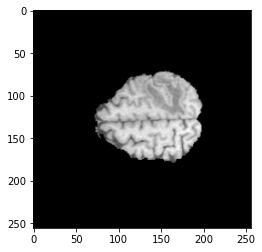

In [20]:
plt.imshow(data[0].numpy()[1][0], cmap='gray')

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


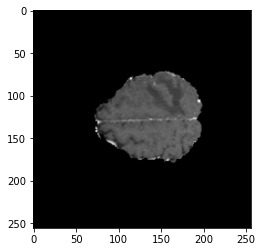

In [17]:
plt.imshow(data[1].numpy()[1][0], cmap='gray')

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


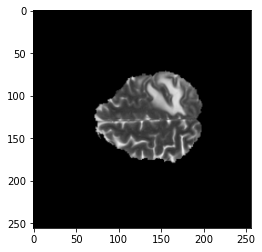

In [18]:
plt.imshow(data[2].numpy()[1][0], cmap='gray')

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


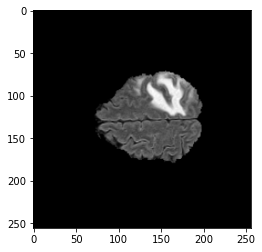

In [19]:
plt.imshow(data[3].numpy()[1][0], cmap='gray')

In [63]:
import torch
from kornia.augmentation import RandomVerticalFlip, RandomAffine
tensor = torch.from_numpy(t1[:, :, 100]).unsqueeze(0).unsqueeze(0)

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


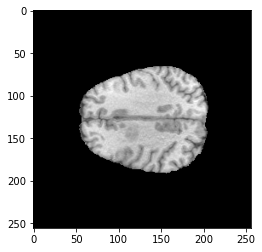

In [65]:
image_flip = RandomVerticalFlip(p=1)(tensor)
plt.imshow(image_flip.numpy()[0][0], cmap='gray')

/home/jiang/miniconda3/envs/notebook/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


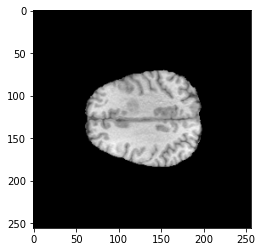

In [66]:
image_scale = RandomAffine(0, scale=[0.9, 1.1], p=1)(tensor)
plt.imshow(image_scale.numpy()[0][0], cmap='gray')